# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


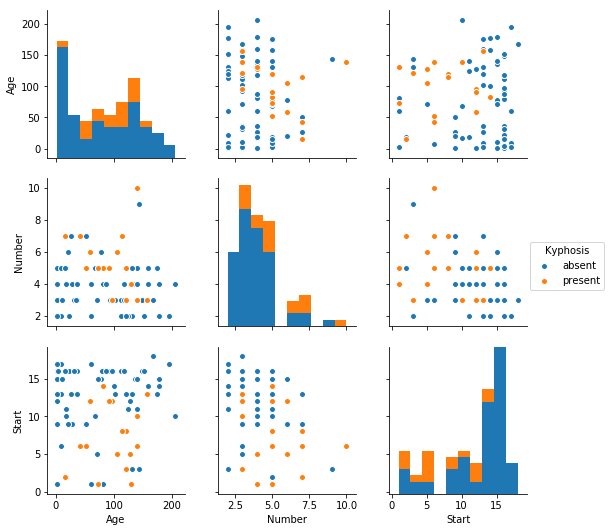

In [5]:
sns.pairplot(df, hue = 'Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)

In [8]:
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction and Evaluation

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.89      0.77      0.83        22
     present       0.17      0.33      0.22         3

   micro avg       0.72      0.72      0.72        25
   macro avg       0.53      0.55      0.53        25
weighted avg       0.81      0.72      0.76        25



In [16]:
print(confusion_matrix(y_test, predictions))

[[17  5]
 [ 2  1]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.90      0.82      0.86        22
     present       0.20      0.33      0.25         3

   micro avg       0.76      0.76      0.76        25
   macro avg       0.55      0.58      0.55        25
weighted avg       0.82      0.76      0.78        25



[[18  4]
 [ 2  1]]


In [25]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Tree Visualization

In [22]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [ ]:
!pip install pydotplus

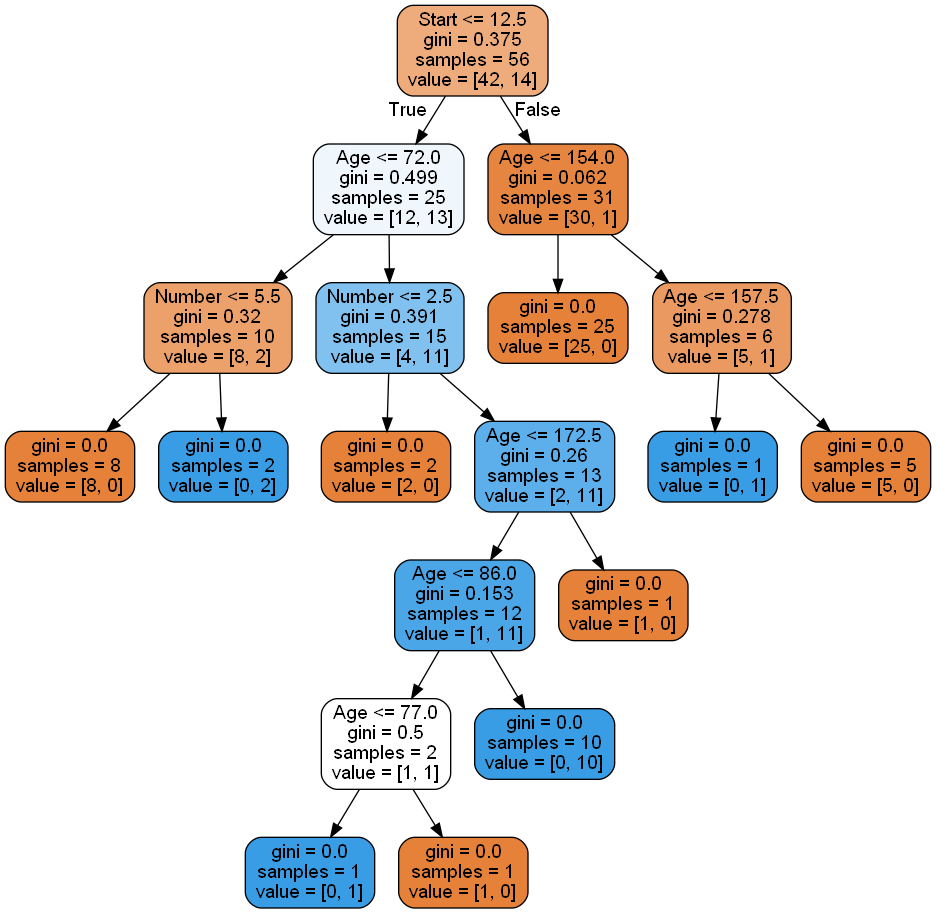

In [41]:
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [39]:
from sklearn import datasets

In [50]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=23678 sha256=90baa69f3b45709cce7115c98845b17bb62078e9b746bf7eee2d1fef06964fdd
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1f\5c\ba\f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus


You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [43]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

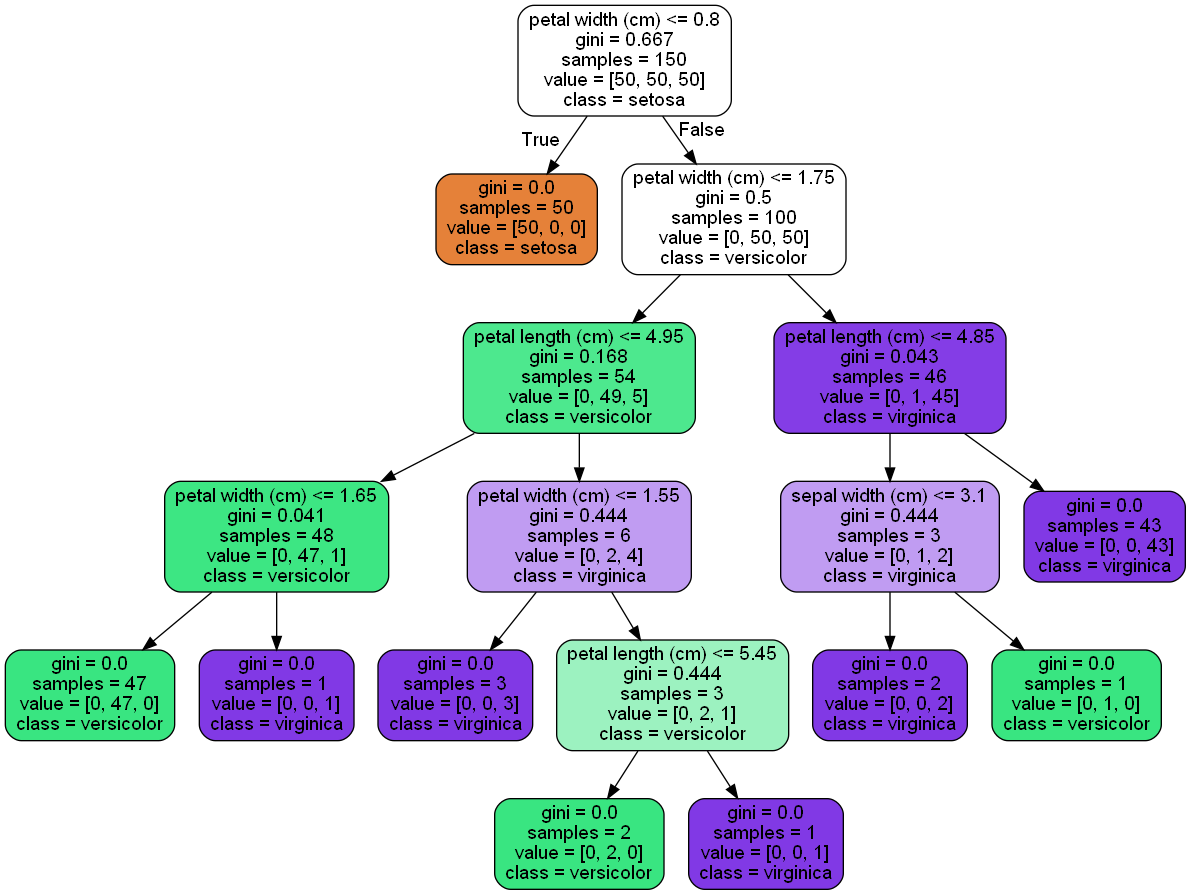

In [44]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,filled=True,rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())